In [1]:
import os
import numpy as np
from HSI_class import HSI
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Load prediction
results_list = []
results_path = r"/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/simsiam/simsiam/linux/predictions/RF/20250602_134209"
result_path = []

total = 0
for filename in os.listdir(results_path):
    file_path = os.path.join(results_path, filename)
    if os.path.isfile(file_path):  # Check if it's a file
        # print(f"Processing file: {file_path}")
        result_path.append(file_path)
        total +=1
        
result_path = sorted(result_path)

for path in result_path:
    print(path)
    


for filename in result_path:
    if os.path.isfile(filename):  # Check if it's a file
        print(f"Processing file: {filename}")
        pred_matrix = np.load(filename)
        results_list.append(pred_matrix)
  
print(total)

/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/simsiam/simsiam/linux/predictions/RF/20250602_134209/results 0 RF.npy
/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/simsiam/simsiam/linux/predictions/RF/20250602_134209/results 1 RF.npy
/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/simsiam/simsiam/linux/predictions/RF/20250602_134209/results 2 RF.npy
/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/simsiam/simsiam/linux/predictions/RF/20250602_134209/results 3 RF.npy
/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/simsiam/simsiam/linux/predictions/RF/20250602_134209/results 4 RF.npy
/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/simsiam/simsiam/linux/predictions/RF/20250602_134209/results 5 RF.npy
/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/simsiam/simsiam/linu

In [3]:
datasets_path = r"/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/Dataset/Hyperspectral oil spill detection datasets"

datasets = []
dataset_path = []

i = 0
for filename in os.listdir(datasets_path):
    if i>2:
        break
    file_path = os.path.join(datasets_path, filename)
    dataset_path.append(file_path)

dataset_path = sorted(dataset_path)

for path in dataset_path:
    print(path)

for file in dataset_path:
    if i>10:
        break
    if os.path.isfile(file):  # Check if it's a file
        print(f"Processing file: {file}")
        hsi = HSI(file)
        datasets.append(hsi)
    i += 1

/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/Dataset/Hyperspectral oil spill detection datasets/.ipynb_checkpoints
/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/Dataset/Hyperspectral oil spill detection datasets/GM01.mat
/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/Dataset/Hyperspectral oil spill detection datasets/GM02.mat
/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/Dataset/Hyperspectral oil spill detection datasets/GM03.mat
/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/Dataset/Hyperspectral oil spill detection datasets/GM04.mat
/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/Dataset/Hyperspectral oil spill detection datasets/GM05.mat
/home/wijayanti/Desktop/FathanAbi/TA/tugas-akhir-model-deteksi-tumpahan-minyakl/Dataset/Hyperspectral oil spill detection datasets/GM06.mat
/home/wija

10


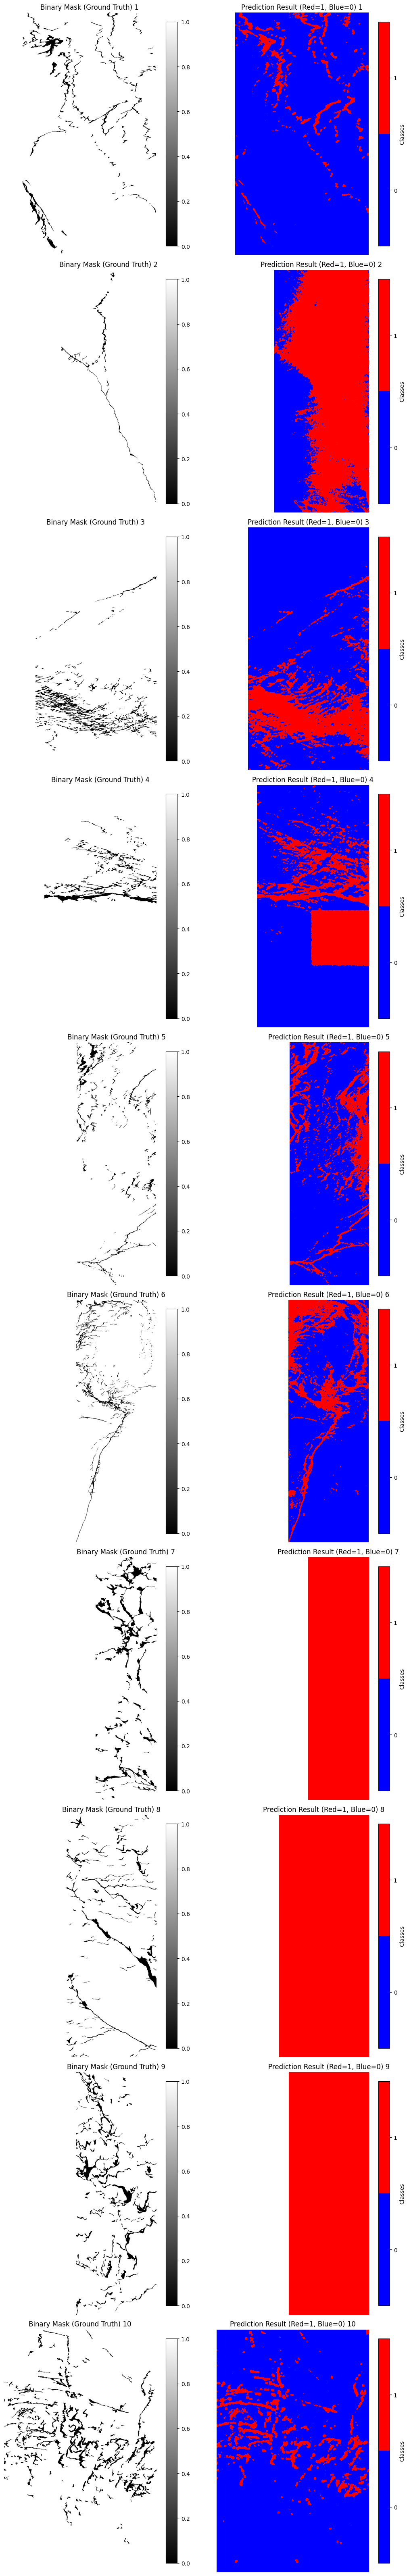

In [4]:
print(total)
# Define custom color map for prediction
custom_cmap = ListedColormap(['blue', 'red'])

# Create figure with 2 subplots side by side
fig, axs = plt.subplots(total, 2, figsize=(12, 64))

for i in range(total):
    dataset = datasets[i]
    gt = dataset.gt

    # --- First plot: Ground Truth (Binary Mask) ---
    im1 = axs[i][0].imshow(1 - gt, cmap='gray')
    axs[i][0].set_title(f'Binary Mask (Ground Truth) {i+1}')
    axs[i][0].axis('off')
    fig.colorbar(im1, ax=axs[i][0], fraction=0.046, pad=0.04)

    # --- Second plot: Predictions ---
    im2 = axs[i][1].imshow(results_list[i], cmap=custom_cmap, interpolation='nearest')
    axs[i][1].set_title(f'Prediction Result (Red=1, Blue=0) {i+1}')
    axs[i][1].axis('off')
    fig.colorbar(im2, ax=axs[i][1], ticks=[0, 1], label="Classes", fraction=0.046, pad=0.04)
    im2.set_clim(-0.5, 1.5)





plt.tight_layout()
plt.show()
